In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def pltimage(img,title,value):
    for i in range(value):
        plt.subplot(2,2,i+1)
        plt.imshow(img[i],'gray')
        plt.title(title[i])
        plt.xticks([]),plt.yticks([])
    return plt.show() 

def BGR2RGB(x):
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    return x

def oneplt(x,title):
    plt.imshow(x,'gray'),plt.title(title)
    plt.axis("off")
    plt.show()

In [42]:
img = cv2.imread('Input/Image/sudoku.jpeg',0)

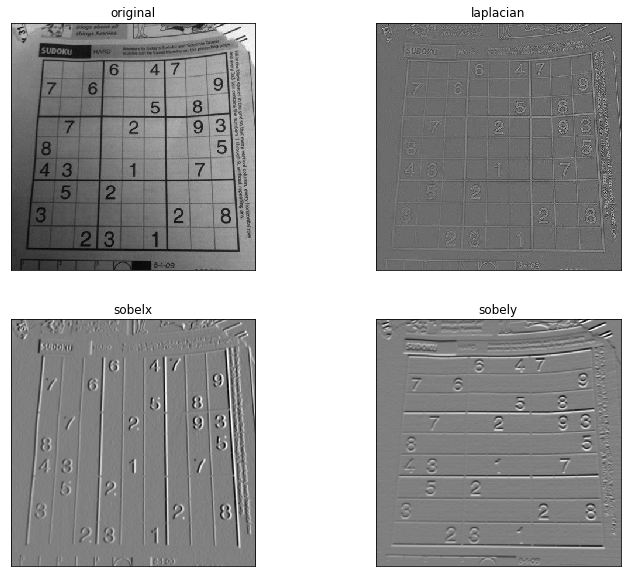

In [34]:
plt.figure(figsize=(12,10))
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
# plt.figure(figsize=(20,15))

images = [img,laplacian,sobelx,sobely,]
titles = ["original","laplacian","sobelx",'sobely']
pltimage(images,titles,4)


### Canny Edge detection


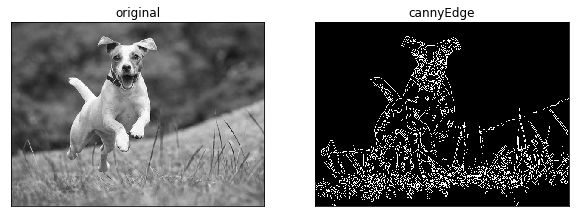

In [55]:
# Canny Edge Detection uses gradient values as thresholds
image = cv2.imread('Input/Image/dog.jpg',0)
canny = cv2.Canny(image, 50, 120)
titles=["original","cannyEdge"]
plt.figure(figsize=(10,8))
images = [image,canny]
pltimage(images,titles,2)

### Getting Perpsective Transform

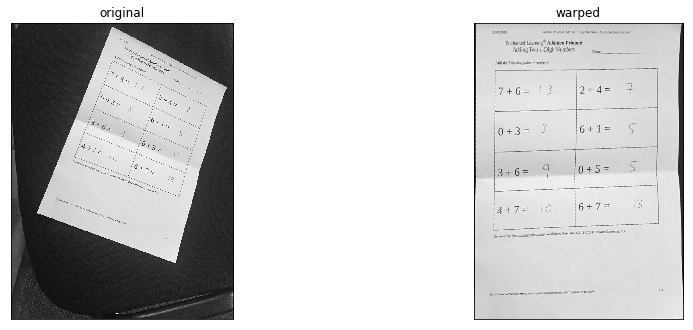

In [59]:

image = cv2.imread('Input/Image/scan.jpg',0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))
titles=["original","warped"]
plt.figure(figsize=(15,12))
images = [image,warped]
pltimage(images,titles,2)


### In affine transforms you only need 3 coordiantes to obtain the correct transform

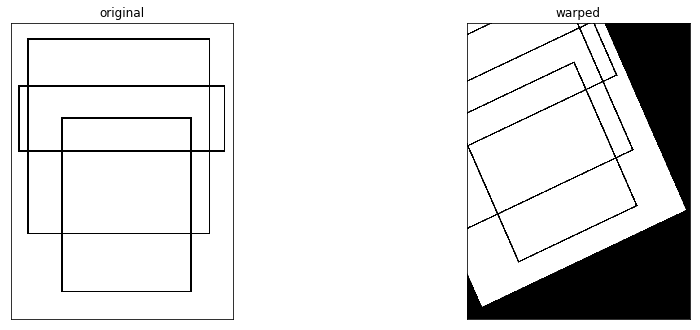

In [60]:
image = cv2.imread('Input/Image/ex2.jpg')
rows,cols,ch = image.shape

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getAffineTransform(points_A, points_B)

warped = cv2.warpAffine(image, M, (cols, rows))

titles=["original","warped"]
plt.figure(figsize=(15,12))
images = [image,warped]
pltimage(images,titles,2)